# modifyParameters

- This notebook is designed to open the default CLM parameter file and modify one or several fields.  
- It's easier to run if you've made a local copy of the parameter file somewhere in your working directory.
- You can find the parameter file by looking at your `lnd_in` file from a case directory on the command line.
    > e.g. `cat ~/scratch/NEON_cases/KONZ.transient/run/lnd_in | grep fsurdat`
- Then I created a copy of this parameter file here (~/scratch/NEON_cases/.)
    > on Cheyenne: `cp /glade/p/cesmdata/cseg/inputdata/lnd/clm2/surfdata_map/NEON/surfdata_1x1_NEON_KONZ_hist_78pfts_CMIP6_simyr2000_c230111.nc 
~/scratch/NEON_cases/.`

The most comming thing you may want to change on the surface dataset is the plant functional type for a site, or the leaf area index (if you're running an satelite phenology (SP) case.

- You can see what the default pft is using the following code on the command line

> on Cheyenne: `ncdump -v PCT_NAT_PFT /glade/p/cesmdata/cseg/inputdata/lnd/clm2/surfdata_map/NEON/surfdata_1x1_NEON_KONZ_hist_78pfts_CMIP6_simyr2000_c230111.nc`

This tutorial has 3 parts:
1. Open the surface dataset
2. Change the dominant plant functional type (PFT).
3. Modify leaf area index (LAI) for the dominant PFT (for SP cases only).

Created by Will Wieder May 2023

In [1]:
# load libraries
import xarray as xr
import pandas as pd
import os
import netCDF4
import numpy as np

## 1. Open the surface dataset
As mentioned above, I've alreay copied the file to a local directory.

In [2]:
pathin = '~/scratch/NEON_cases/'
basefile = pathin + 'surfdata_1x1_NEON_KONZ_hist_78pfts_CMIP6_simyr2000_c230111.nc'
s = xr.open_dataset(basefile,decode_times=False) 
s.var

<bound method DatasetAggregations.var of <xarray.Dataset>
Dimensions:                  (lsmlon: 1, lsmlat: 1, nlevsoi: 10, natpft: 15,
                              cft: 64, time: 12, lsmpft: 79, numurbl: 3,
                              numrad: 2, nlevurb: 5, nglcecp1: 11, nglcec: 10)
Coordinates:
  * lsmlon                   (lsmlon) float64 263.4
  * lsmlat                   (lsmlat) float64 39.1
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16 17 18 19 20 ... 73 74 75 76 77 78
  * time                     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlevsoi, lsmpft, numurbl, numrad, nlevurb,
                                nglcecp1, nglcec
Data variables: (12/79)
    mxsoil_color             (lsmlat, lsmlon) int32 ...
    SOIL_COLOR               (lsmlat, lsmlon) int32 ...
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float64 ...
    PCT_CLAY                 (nlevsoi, ls

## Lots of data goes into the surface dataset.

It's too much for us to go over here. Hopefully between the [user's guide and tech note](https://escomp.github.io/ctsm-docs/versions/master/html/index.html) find what you need to regarding surface data.

In the NEON cases we set a dominant PFT for each site and modified soil properties to reflect NEON megapit measurements.
The real ecosystems at NEON sites, however, have multiple plant functional types represented in the tower footprint or region.  For example, mixed deciduous and evergreen forests, grassland - forest savannahs, mixed grasslands and woody shrublands, or a mix of C3 and C4 grasses.  Users can set the PFT mixtures to reflect local conditions, although this makes it difficult to understand individual PFT's contributions to the gridcell weighted fluxes we typically look at.

For now, we'll just look at how to change the single dominant PFT at a site.


## 2. Changing the dominant PFT
For example, the surface datset  `PCT_NAT_PFT` defines the percent plant functional type on the natural vegetated landunit.
- What is the dominant PFT index at KONZ?
- What PFT does this correspond to in the model?

In [10]:
s.PCT_NAT_PFT

<xarray.DataArray 'PCT_NAT_PFT' (natpft: 15, lsmlat: 1, lsmlon: 1)>
array([[[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[100.]]])
Coordinates:
  * lsmlon   (lsmlon) float64 263.4
  * lsmlat   (lsmlat) float64 39.1
  * natpft   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
Attributes:
    long_name:  percent plant functional type on the natural veg landunit (% ...
    units:      unitless

Let's imagine that you studied plant composition at the KONZ site and found a there are a number of C3 and C4 grasses in the tower footprint.  We can modify the surface dataset to see what a C3 grass (pft 13) simulation looks like at KONZ.

To do thsi, we'll create a new surface data file, change values for `PCT_NAT_PFT`, and save the new file.

In [13]:
s2 = s.copy(deep=True)         # create a copy of the surface dataset to modify
s2['PCT_NAT_PFT'][[13]] = 100. # set C3 grasses to 100
s2['PCT_NAT_PFT'][[14]] = 0.   # set C4 grasses to 0
s2['PCT_NAT_PFT']              # check that it worked as intended

<xarray.DataArray 'PCT_NAT_PFT' (natpft: 15, lsmlat: 1, lsmlon: 1)>
array([[[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[100.]],

       [[  0.]]])
Coordinates:
  * lsmlon   (lsmlon) float64 263.4
  * lsmlat   (lsmlat) float64 39.1
  * natpft   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
Attributes:
    long_name:  percent plant functional type on the natural veg landunit (% ...
    units:      unitless

In [ ]:
# now save the file
s2.to_netcdf(pathin + 'surfdata_1x1_NEON_KONZ_hist_78pfts_CMIP6_simyr2000_c230111_C3grass.nc')

You'll notice this is a non-standard way to modify surface dataset in in CTSM.  It's really just designed for quick experiments:
- I like to make the name descriptive so I remember what I changed.

## 3. Modify LAI for a PFT (SP simulations only)
For this example, let's assume you derived a climatology of LAI from NEON or remote sensing data products.  This would be a huge help, because the values being used in CLM in global simulations are likely not representative of local  conditions at NEON sites. 

<div class="alert alert-block alert-warning">

<b>HINT:</b>  It's a good idea to check what PFT is actually on the surface dataset for the site you're running.

</div>

Let's see what LAI looks like 

In [35]:
s2.PCT_NAT_PFT.isel(natpft=slice(1,15))

<xarray.DataArray 'PCT_NAT_PFT' (natpft: 14, lsmlat: 1, lsmlon: 1)>
array([[[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[  0.]],

       [[100.]],

       [[  0.]]])
Coordinates:
  * lsmlon   (lsmlon) float64 263.4
  * lsmlat   (lsmlat) float64 39.1
  * natpft   (natpft) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14
Attributes:
    long_name:  percent plant functional type on the natural veg landunit (% ...
    units:      unitless

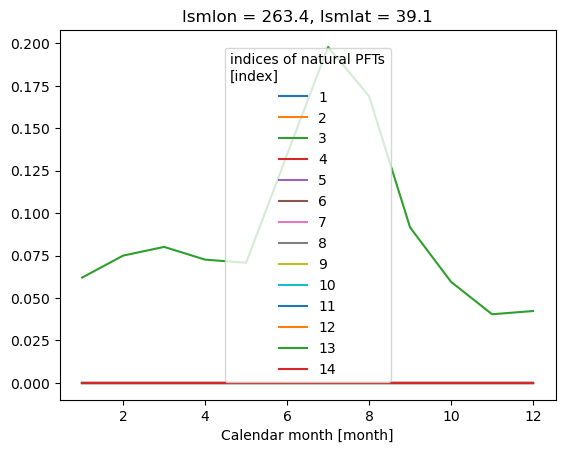

In [34]:
# This is a hacky way to look at the LAI timeseries and identify the dominant PFT at a site
NATPFT = s2.PCT_NAT_PFT.isel(natpft=slice(1,15)).rename({"natpft":'lsmpft'})
(s2.MONTHLY_LAI.isel(lsmpft=slice(0,14))*NATPFT/100).plot(hue='lsmpft') ;

In [ ]:
# OK, our dominant PFT is #14, C4 grasses, with a maximum LAI of 1.75 at the site

In [ ]:
ix    = 14
param = 'leafcn'
m = p[param].values
print(m[ix])

In [ ]:
# Now we can change this value with something that's hypothetically been observed.
new_leafcn = 30
p3 = p.copy(deep=True)
p3[param].values[ix]= new_leafcn
p3[param][0:16]

In [ ]:
# now save the file
p3.to_netcdf(pathin + 'ctsm51_params.c211112_tdf_leafcn30.nc')

---

<div class="alert alert-block alert-success">
<b>Congratulations:</b> 
    
You can now modify parameter files!  
Remember, to run with one of these you'll have to spin up the model first.

</div>
